In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/kt_aivle/big_project/data/preprocessed_data/'

forest_kids = pd.read_excel(path + 'preprocessed_forests_kids_with_excel.xlsx')
okay_kids = pd.read_excel(path + 'preprocessed_okay_kids.xlsx')
seoul_kidscafe = pd.read_excel(path + 'preprocessed_seoul_kidscafe.xlsx')
seoul_policy = pd.read_excel(path + 'preprocessed_seoul_policy.xlsx')
culture_kids = pd.read_excel(path + 'preprocessed_culture_kids_with_excel.xlsx')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
culture_kids['중분류'].value_counts()

중분류
공연장/문화예술회관    211
미술관           155
도서관           150
박물관           101
문화원            45
기념관            16
Name: count, dtype: int64

In [ ]:
# culture_kids.loc[87, '시설소개'] = "연극, 뮤지컬, 공연"
# culture_kids.loc[99, '시설소개'] = "연극, 뮤지컬, 공연"
# culture_kids.loc[556, '시설소개'] = "미술관, 전시"

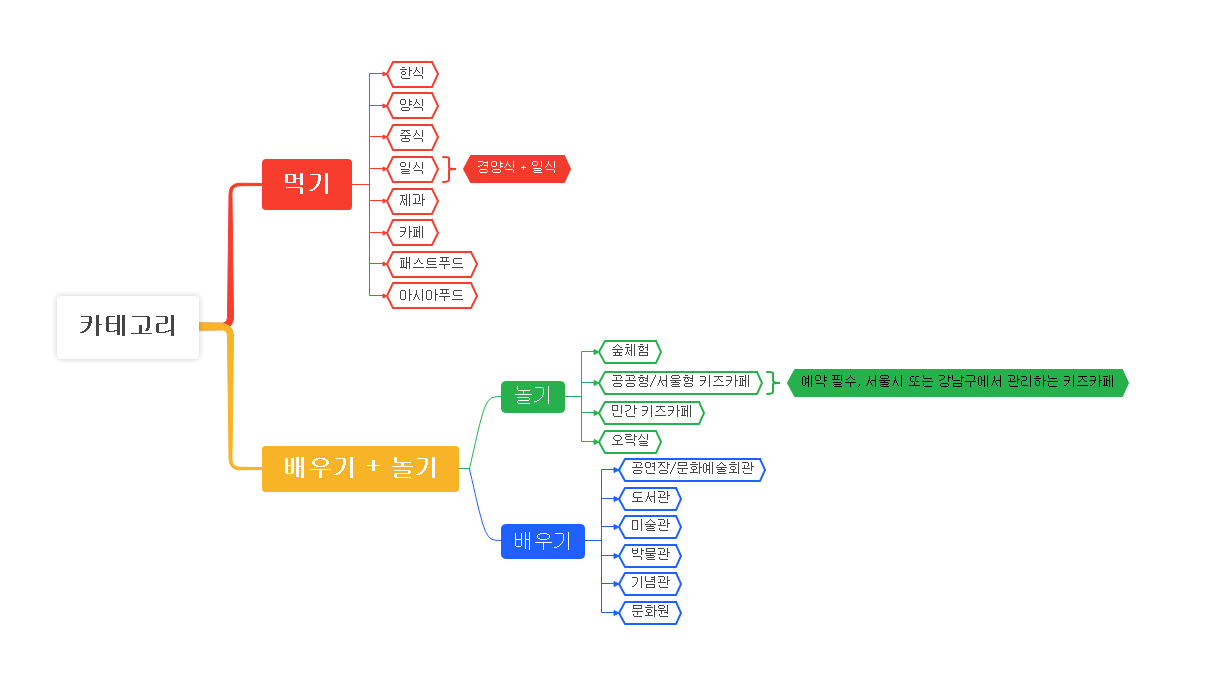

In [ ]:
# 숲체험, 및 유아숲 관련 키워드 정리

keyword_df = pd.DataFrame({
    "대분류" : ['먹기'] * 8 + ['배우기'] * 6 + ['놀기'] * 4,
    "중분류" : ['한식', '양식', '중식', '일식', '제과', '카페', '패스트푸드', '아시아푸드',
                '공연장/문화예술회관', '도서관', '미술관', '박물관', '기념관', '문화원',
                '숲체험', '공공형/서울형 키즈카페', '민간 키즈카페', '오락실']
    })

# 경양식 + 일식 = 일식
# 데이터가 서로 적어, 유사한 메뉴를 가지고 있는 음식점들이 대다수이기에, 하나로 합침.

keywords_data = {
    ('먹기', '') : "음식점, 식사, 식당, 메뉴, 푸드, 맛있는,",
    ('먹기', '한식') : "한정식, 밥, 모임하기 좋은, 한식,",
    ('먹기', '양식') : "풍미가 있는, 분위기 좋은, 고급스러운, 양식,",
    ('먹기', '중식') : "빠른 조리, 중국집, 중화요리, 자장면, 짬봉, 중식, 탕수육,",
    ('먹기', '일식') : "신선한 재료, 바삭한, 튀김, 일식, 경양식,",
    ('먹기', '제과') : "밀가루, 빵집, 베이커리, 제빵, 케이크, 도넛. 제과,",
    ('먹기', '카페') : "음료, 디저트, 에이드, 커피, 주스, 카페,",
    ('먹기', '패스트푸드') : "빠른조리, 배달, 햄버거, 기름진, 패스트푸드, 정커푸드,",
    ('먹기', '아시아푸드') : "아시아푸드, 향신료가 가득한, 베트남, 동남아, 아시아, 쌀국수, 태국,",
    ('배우기', '') : "깨끗한, 쾌적한, 볼거리, 볼만한, 문화시설, 공공시설, 공공기관, 창의력, 지식, 교양, 유익한",
    ('배우기', '공연장/문화예술회관') : "공연장, 문화예술회관, 예술회관, 예술, 문화예술, 재밌는, 프로그램, 문화 프로그램, 관람, 클래식, 공연, 극장, 전시, 복합시설,",
    ('배우기', '도서관') : "도서관, 독서, 어린이자료실, 공공도서관, 한적한, 분위기 좋은, 주차장, 조용한, 책, 동화책, 영어원서, 서적, 그림책, 독서 프로그램, 유아용 책, 어린이 열람실, 유모차 출입, 독서 이벤트,",
    ('배우기', '미술관') : "미술관, 전시관, 갤러리, 전시, 미술, 작품, 작가, 그림, 굿즈,",
    ('배우기', '박물관') : "박물관, 역사, 전통적인, 과거, 시대, 기록, 전통, 테마",
    ('배우기', '기념관') : "기념관, 문화, 기념 행사, 전시, 역사, 전통적인, 과거, 시대, 기록, 전통,",
    ('배우기', '문화원') : "문화원, 문화센터, 프로그램, 배움, 강의, 강좌, 취미생활, 저렴함, 문화생활, 상담, 강사님, 행사, 체험, 체험활동, 수업, 수강, 축제, 교실, 다문화,",
    ('놀기', '') : "활동적인, 시원한, 쉼터, 놀이, 게임, 놀이시설, 실내놀이터, 놀이터, 아이와 함께, 즐거운, 재밌는,",
    ('놀기', '숲체험') : "예약, 체험활동, 숲, 숲체험, 체험학습, 자연, 깨끗한, 넓은 공간, 다양한 활동, 피크닉, 산책, 식물, 동물, 나무, 곤충, 꽃, 채집,",
    ('놀기', '공공형/서울형 키즈카페') : "예약, 공공시설, 관리, 넓은, 쾌적한, 깨끗한, 다양한 활동, 공공형, 서울형, 키즈카페,",
    ('놀기', '민간 키즈카페') : "넓은, 다양한 활동, 키즈카페,",
    ('놀기', '오락실') : "게임, 좁은, 오락시설, 오락실, 인형뽑기, 인형, 자동차, 레이싱, 총,",
}

# 먼저 대분류 키워드를 추가
keyword_df['카테고리_키워드'] = keyword_df['대분류'].map(lambda x: keywords_data.get((x, ""), ""))
keyword_df['카테고리_키워드'] = keyword_df.apply(lambda row: row['카테고리_키워드'] + (", " + keywords_data[(row['대분류'], row['중분류'])] if (row['대분류'], row['중분류']) in keywords_data else ""), axis=1)
keyword_df

,대분류,중분류,카테고리_키워드
0,먹기,한식,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 한정식, 밥, 모임하기 좋은, 한식,"
1,먹기,양식,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 풍미가 있는, 분위기 좋은, 고급스..."
2,먹기,중식,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 빠른 조리, 중국집, 중화요리, 자..."
3,먹기,일식,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 신선한 재료, 바삭한, 튀김, 일식..."
4,먹기,제과,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 밀가루, 빵집, 베이커리, 제빵, ..."
5,먹기,카페,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 음료, 디저트, 에이드, 커피, 주..."
6,먹기,패스트푸드,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 빠른조리, 배달, 햄버거, 기름진,..."
7,먹기,아시아푸드,"음식점, 식사, 식당, 메뉴, 푸드, 맛있는,, 아시아푸드, 향신료가 가득한, 베트..."
8,배우기,공연장/문화예술회관,"깨끗한, 쾌적한, 볼거리, 볼만한, 문화시설, 공공시설, 공공기관, 창의력, 지식,..."
9,배우기,도서관,"깨끗한, 쾌적한, 볼거리, 볼만한, 문화시설, 공공시설, 공공기관, 창의력, 지식,..."


In [ ]:
# 숲체험 데이터, 서울오케이키즈존 데이터 병합
forest_kids.drop(columns = ['키워드'], inplace = True)
okay_kids.drop(columns = ['상세설명'], inplace = True)

merge_data = pd.concat([forest_kids, okay_kids], ignore_index = True)
print(len(merge_data))

# 서울 유원시설 데이터 컬럼명 변경
seoul_policy = seoul_policy.rename(columns = {'사업장명' : '콘텐츠명', '도로명주소' : '새주소[도로명 주소]', 'x좌표값' : '좌표[X]', 'y좌표값' : '좌표[Y]'})
seoul_policy['구명'] = seoul_policy['새주소[도로명 주소]'].apply(lambda x : x.split(' ')[1])

# 서울 유원시설 데이터 추가 병합
merge_data = pd.concat([merge_data, seoul_policy], ignore_index = True)
print(len(merge_data))

# 서울형 키즈카페 데이터 컬럼 삭제 및 컬럼명 변경
seoul_kidscafe.drop(columns = ['서비스분류명', '행정동명'], inplace = True)
seoul_kidscafe = seoul_kidscafe.rename(columns = {'시설명' : '콘텐츠명', '자치구명' : '구명', '기본주소' : '새주소[도로명 주소]', 'x좌표값' : '좌표[X]', 'y좌표값' : '좌표[Y]', '연락처' : '전화번호', '사용료무료여부' : '무료구분'})

# 서울형 키즈카페 데이터 추가 병합
merge_data = pd.concat([merge_data, seoul_kidscafe], ignore_index = True)
print(len(merge_data))

# 문화시설 데이터 컬럼 삭제 및 컬럼명 변경
culture_kids.drop(columns = ['관람료', '키워드'], inplace = True)
culture_kids = culture_kids.rename(columns = {'문화시설명' : '콘텐츠명', '주소' : '새주소[도로명 주소]', '홈페이지' : '웹URL', '경도' : '좌표[X]', '위도' : '좌표[Y]', '실내/실외' : '실내_실외'})
culture_kids['새주소[도로명 주소]'] = culture_kids['새주소[도로명 주소]'].apply(lambda x: ' '.join(x.split()))
culture_kids.loc[culture_kids['새주소[도로명 주소]'] == '세종로 81-3', '새주소[도로명 주소]']= '서울특별시 종로구 세종대로 175'
culture_kids.loc[culture_kids['새주소[도로명 주소]'] == '일원동 713', '새주소[도로명 주소]'] = '서울특별시 강남구 일원로 90'
culture_kids.loc[culture_kids['새주소[도로명 주소]'] == '방배동 981-10', '새주소[도로명 주소]'] = '서울특별시 서초구 효령로 114'
culture_kids['구명'] = culture_kids['새주소[도로명 주소]'].apply(lambda x : x.split(' ')[1])
# 문화시설 데이터 추가 병합
merge_data = pd.concat([merge_data, culture_kids], ignore_index = True)
print(len(merge_data))

# 중분류 합치기 . 경양식 + 일식 = 일식
merge_data.loc[merge_data['중분류'] == '경양식', '중분류'] = '일식'

678
857
888
1566


In [ ]:
merge_keyword_data = pd.merge(merge_data, keyword_df, on = ['대분류', '중분류'], how = 'left')

# 주차장이 있다면, 주차장이라는 키워드 추가. 없으면 검색되지 않는 의미로 추가 X
merge_keyword_data.loc[merge_keyword_data['주차가능여부'] == 'O', '카테고리_키워드'] += '주차장'

# 이용료 또는 금액이 무료이면, 무료 키워드 추가, 유료이면 유료 키워드 추가, 없는 값은 불확실한 정보이므로 표기 X
merge_keyword_data.loc[(merge_keyword_data['무료구분'] == '무료') | (merge_keyword_data['무료구분'] == 'Y'), '카테고리_키워드'] += '무료,'
merge_keyword_data.loc[(merge_keyword_data['무료구분'] == '유료') | (merge_keyword_data['무료구분'] == 'N'), '카테고리_키워드'] += '유료,'

# 유아의자, 유아체어, 아기의자, 유아용의자, 아기의자,
merge_keyword_data.loc[(merge_keyword_data['유아용품'].str.contains('의자')) | (merge_keyword_data['유아용품'].str.contains('의자')), '카테고리_키워드'] += '유아의자, 유아체어, 어린이의자, 어린이체어,'

# 불필요 컬럼 제거
merge_keyword_data.drop(columns = ['시군', '영업시간', '주차가능여부', '무료구분', '신청가능연령'])

merge_keyword_data['전체_키워드'] = merge_keyword_data['카테고리_키워드'] + merge_keyword_data['키즈메뉴(아이가먹을수있는 메뉴)'].fillna('')

In [ ]:
# 숲체험, 및 유아숲 관련 키워드 정리

keyword_df = pd.DataFrame({
    "대분류" : ['먹기'] * 8 + ['배우기'] * 6 + ['놀기'] * 4,
    "중분류" : ['한식', '양식', '중식', '일식', '제과', '카페', '패스트푸드', '아시아푸드',
                '공연장/문화예술회관', '도서관', '미술관', '박물관', '기념관', '문화원',
                '숲체험', '공공형/서울형 키즈카페', '민간 키즈카페', '오락실']
    })

# 경양식 + 일식 = 일식
# 데이터가 서로 적어, 유사한 메뉴를 가지고 있는 음식점들이 대다수이기에, 하나로 합침.

keywords_data = {
    ('먹기', '') : "음식점, 식사, 식당, 메뉴, 푸드, 맛있는, 맛",
    ('먹기', '한식') : "한정식, 밥, 한식,",
    ('먹기', '양식') : "양식,",
    ('먹기', '중식') : "중국집, 중화요리, 자장면, 짬봉, 중식, 탕수육,",
    ('먹기', '일식') : "튀김, 일식, 경양식,",
    ('먹기', '제과') : "빵집, 베이커리, 제빵, 케이크, 도넛. 제과,",
    ('먹기', '카페') : "음료, 디저트, 에이드, 커피, 주스, 카페,",
    ('먹기', '패스트푸드') : "햄버거, 패스트푸드, 정커푸드,",
    ('먹기', '아시아푸드') : "아시아푸드, 향, 향신료, 베트남, 동남아, 아시아, 쌀국수, 태국,",
    ('배우기', '') : "문화시설, 공공시설, 공공기관, 창의력, 지식, 교양, 유익한",
    ('배우기', '공연장/문화예술회관') : "공연장, 문화예술회관, 예술회관, 예술, 문화예술, 프로그램, 문화 프로그램, 관람, 클래식, 공연, 극장, 연극, 전시, 복합시설,",
    ('배우기', '도서관') : "도서관, 독서, 어린이자료실, 공공도서관, 한적한, 분위기 좋은, 주차장, 조용한, 책, 동화책, 영어원서, 서적, 그림책, 독서 프로그램, 유아용 책, 어린이 열람실, 유모차 출입, 독서 이벤트,",
    ('배우기', '미술관') : "미술관, 전시관, 갤러리, 전시, 미술, 작품, 작가, 그림, 굿즈,",
    ('배우기', '박물관') : "박물관, 역사, 전통적인, 과거, 시대, 기록, 전통, 테마, 문화유산, 현대사, 문명, 유적,",
    ('배우기', '기념관') : "기념관, 문화, 기념 행사, 전시, 역사, 전통적인, 과거, 시대, 기록, 전통,",
    ('배우기', '문화원') : "문화원, 문화센터, 프로그램, 배움, 강의, 강좌, 취미생활, 저렴함, 문화생활, 상담, 강사님, 행사, 체험, 체험활동, 수업, 수강, 축제, 교실, 다문화,",
    ('놀기', '') : "활동적인, 쉼터, 놀이, 게임, 놀이시설, 놀이터, 즐거운, 재밌는,",
    ('놀기', '숲체험') : "예약, 체험활동, 숲, 숲체험, 체험학습, 자연, 관찰, 깨끗한, 피크닉, 산책, 식물, 동물, 나무, 곤충, 꽃, 채집, 숲속놀이터,",
    ('놀기', '공공형/서울형 키즈카페') : "예약, 관리, 쾌적한, 넓은, 깨끗한, 안전한, 위생적인, 키즈카페, 공공형 키즈카페, 서울형 키즈카페, 강남형 키즈카페, 키즈카페, 휴식, 수유실,",
    ('놀기', '민간 키즈카페') : "키즈카페, 휴식, 수유실, 쾌적한, 넓은, 깨끗한, 안전한, 위생적인,",
    ('놀기', '오락실') : "게임, 좁은, 오락시설, 오락실, 인형뽑기, 인형, 자동차, 레이싱, 총,",
}

# 먼저 대분류 키워드를 추가
keyword_df['카테고리_키워드'] = keyword_df['대분류'].map(lambda x: keywords_data.get((x, ""), ""))
keyword_df['카테고리_키워드'] = keyword_df.apply(lambda row: row['카테고리_키워드'] + (", " + keywords_data[(row['대분류'], row['중분류'])] if (row['대분류'], row['중분류']) in keywords_data else ""), axis=1)
keyword_df


# 주차장이 있다면, 주차장이라는 키워드 추가. 없으면 검색되지 않는 의미로 추가 X
merge_keyword_data.loc[merge_keyword_data['주차가능여부'] == 'O', '카테고리_키워드'] += '주차장'

# 이용료 또는 금액이 무료이면, 무료 키워드 추가, 유료이면 유료 키워드 추가, 없는 값은 불확실한 정보이므로 표기 X
merge_keyword_data.loc[(merge_keyword_data['무료구분'] == '무료') | (merge_keyword_data['무료구분'] == 'Y'), '카테고리_키워드'] += '무료,'
merge_keyword_data.loc[(merge_keyword_data['무료구분'] == '유료') | (merge_keyword_data['무료구분'] == 'N'), '카테고리_키워드'] += '유료,'

# 유아의자, 유아체어, 아기의자, 유아용의자, 아기의자,
merge_keyword_data.loc[(merge_keyword_data['유아용품'].str.contains('의자')) | (merge_keyword_data['유아용품'].str.contains('의자')), '카테고리_키워드'] += '유아의자, 유아체어, 어린이의자, 어린이체어

merge_keyword_data['전체_키워드'] = merge_keyword_data['카테고리_키워드'] + merge_keyword_data['키즈메뉴(아이가먹을수있는 메뉴)'].fillna('')


In [ ]:
merge_keyword_data.to_excel('/content/drive/MyDrive/kt_aivle/big_project/data/preprocessed_data/merge_keyword_data.xlsx', index=False)